## Edx Courses
### A list of online courses on edx.org learning platform

#### Context
edX is a massive open online course (MOOC) provider founded by Harvard and MIT. It hosts a wide range of online university-level courses in different disciplines.

#### Content
This dataset contains information about 976 courses that are currently available on the edx.org platform.

#### Acknowledgements
The dataset was scraped using R and the rvest library by Hadely Wickhom.

The dataset is prepared by Muhammad Nakhaee

Here is the dataset link : https://www.kaggle.com/imuhammad/edx-courses

## Content

<ul>
  <li><a href="#part1">1. Loading Data and Checking Values</a></li>
  <li><a href="#part2">2. Description of Each Column in Dataframe</a>
  <li><a href="#part3">3. Data Wrangling</a>
    <ul>
      <li><a href="#part3-1">3.1 Create 3 dataframe by course level</a></li>
      <li><a href="#part3-2">3.2 Create 3 dataframe for pie graph by course Level,subject,language,course_length</a></li>
    </ul>
  </li>
  <li><a href="#part4">4. Data Visualization</a>
    <ul>
      <li><a href="#part4-1">4.1 Draw A Count Plot to show Edx Courses categorized by level and subject</a></li>
      <li><a href="#part4-2">4.2 Show top 10 institution providing courses in Edx</a></li>
      <li><a href="#part4-3">4.3 Show top 5 Course Certificate type by per number of enrolled students</a></li>
      <li><a href="#part4-4">4.4 Show top 10 Course by per number of enrolled students</a></li>
      <li><a href="#part4-5">4.5 Show the spectrum of edx courses by level,subject,language and a length of course </a></li>
      <li><a href="#part4-6">4.6 Show top 20 instructors with presenting course most </a></li>
      <li><a href="#part4-7">4.7 WordCloud </a></li>
    </ul>
  </li>
</ul>

<a id='part1'></a>
## 1. Loading Data and Checking Values

1 - Import libraries I used for visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
from operator import itemgetter
from IPython.display import display, HTML
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator 
from PIL import Image, ImageOps
import plotly.express as px
import plotly.io as pio
import datetime
import matplotlib.cm as mplcm
import random
import matplotlib.colors as mcolors
%matplotlib inline

sns.set(style="darkgrid")

2 - Define dataframe after loading all values from csv file and assigning them to it

In [2]:
file_location_url = "files/edx_courses.csv";

edx_df = pd.read_csv(file_location_url, error_bad_lines=False,encoding = "utf-8")

3 - Deterime how many rows and columns are defined in dataframe

In [3]:
row_count = edx_df.shape[0]
column_count = edx_df.shape[1]

print("Row : {} , Column : {}".format(row_count,column_count))

Row : 975 , Column : 16


4 - Show first 5 values of dataframe

In [4]:
edx_df.head()

title  \
0                                How to Learn Online   
1  Programming for Everybody (Getting Started wit...   
2            CS50's Introduction to Computer Science   
3                                 The Analytics Edge   
4  Marketing Analytics: Marketing Measurement Str...   

                                             summary n_enrolled  \
0  Learn essential strategies for successful onli...    124,980   
1  This course is a "no prerequisite" introductio...    293,864   
2  An introduction to the intellectual enterprise...  2,442,271   
3  Through inspiring examples and stories, discov...    129,555   
4     This course is part of a MicroMasters® Program     81,140   

                           course_type                            institution  \
0              Self-paced on your time                                    edX   
1              Self-paced on your time             The University of Michigan   
2              Self-paced on your time                     Harvard University   
3  Instructor-led on a course schedule  Massachusetts Institute of Technology   
4              Self-paced on your time     University of California, Berkeley   

                                         instructors         Level  \
0            Nina Huntemann-Robyn Belair-Ben Piscopo  Introductory   
1                                  Charles Severance  Introductory   
2                 David J. Malan-Doug Lloyd-Brian Yu  Introductory   
3  Dimitris Bertsimas-Allison O'Hair-John Silberh...  Intermediate   
4                                     Stephan Sorger  Introductory   

                        subject language subtitles         course_effort  \
0  Education & Teacher Training  English   English    2–3 hours per week   
1              Computer Science  English   English    2–4 hours per week   
2              Computer Science  English   English   6–18 hours per week   
3    Data Analysis & Statistics  English   English  10–15 hours per week   
4              Computer Science  English   English    5–7 hours per week   

  course_length                                         price  \
0       2 Weeks   FREE-Add a Verified Certificate for $49 USD   
1       7 Weeks   FREE-Add a Verified Certificate for $49 USD   
2      12 Weeks   FREE-Add a Verified Certificate for $90 USD   
3      13 Weeks  FREE-Add a Verified Certificate for $199 USD   
4       4 Weeks  FREE-Add a Verified Certificate for $249 USD   

                                  course_description  \
0  Designed for those who are new to elearning, t...   
1  This course aims to teach everyone the basics ...   
2  This is CS50x , Harvard University's introduct...   
3  In the last decade, the amount of data availab...   
4  Begin your journey in a new career in marketin...   

                                     course_syllabus  \
0  Welcome - We start with opportunities to meet ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          course_url  
0     https://www.edx.org/course/how-to-learn-online  
1  https://www.edx.org/course/programming-for-eve...  
2  https://www.edx.org/course/cs50s-introduction-...  
3      https://www.edx.org/course/the-analytics-edge  
4  https://www.edx.org/course/marketing-analytics...

5 - Show last 5 values of dataframe

In [5]:
edx_df.tail()

title  \
970  Leaders in Citizen Security and Justice Manage...   
971              Pattern Studying and Making | 图案审美与创作   
972  Computational Neuroscience: Neuronal Dynamics ...   
973  Cities and the Challenge of Sustainable Develo...   
974                      MathTrackX: Special Functions   

                                               summary n_enrolled  \
970  Learn about the latest in prevention, police a...        NaN   
971  Fantastic experiences in beauty and its repres...        NaN   
972  This course explains the mathematical and comp...     11,246   
973  What is a sustainable city? Learn the basics h...      8,775   
974  Understand trigonometric, exponential and loga...        NaN   

                 course_type                               institution  \
970  Self-paced on your time           Inter-American Development Bank   
971  Self-paced on your time                       Tsinghua University   
972  Self-paced on your time  École polytechnique fédérale de Lausanne   
973  Self-paced on your time                               SDG Academy   
974  Self-paced on your time                    University of Adelaide   

                                           instructors         Level  \
970  Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...  Intermediate   
971                                         Yuehua Nie  Introductory   
972                                   Wulfram Gerstner      Advanced   
973                                   Jeffrey D. Sachs  Introductory   
974                                    Dr David Butler  Introductory   

                     subject language    subtitles       course_effort  \
970          Social Sciences  English      English  4–5 hours per week   
971            Art & Culture       中文  English, 中文  3–5 hours per week   
972  Biology & Life Sciences  English      English  4–6 hours per week   
973    Environmental Studies  English      English  1–2 hours per week   
974                     Math  English      English  3–6 hours per week   

    course_length                                         price  \
970      10 Weeks   FREE-Add a Verified Certificate for $25 USD   
971      12 Weeks  FREE-Add a Verified Certificate for $139 USD   
972       6 Weeks  FREE-Add a Verified Certificate for $139 USD   
973       1 Weeks   FREE-Add a Verified Certificate for $25 USD   
974       4 Weeks   FREE-Add a Verified Certificate for $79 USD   

                                    course_description  \
970  The high rates of crime and violence are two o...   
971  Are you an original designer? Or a DIY fancier...   
972  What happens in your brain when you make a dec...   
973  According to the United Nations, urbanization ...   
974  This course is part two of the MathTrackX XSer...   

                                       course_syllabus  \
970                                                NaN   
971                                                NaN   
972  Textbook: Neuronal Dynamics - from single neur...   
973  Module 1: Introduction to the SDGsProfessor Je...   
974                                                NaN   

                                            course_url  
970  https://www.edx.org/course/leaders-in-citizen-...  
971  https://www.edx.org/course/pattern-studying-an...  
972  https://www.edx.org/course/computational-neuro...  
973  https://www.edx.org/course/cities-and-the-chal...  
974  https://www.edx.org/course/mathtrackx-special-...

6 - Show each column information of dataframe

In [6]:
edx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

7 - Show how many variables there are in dataframe

In [7]:
edx_df.count()

title                 975
summary               922
n_enrolled            855
course_type           975
institution           975
instructors           972
Level                 975
subject               975
language              975
subtitles             972
course_effort         975
course_length         975
price                 975
course_description    935
course_syllabus       417
course_url            975
dtype: int64

8 - Show descriptive statistics of dataframe

In [8]:
edx_df.describe()

title                                         summary  \
count                    975                                             922   
unique                   972                                             887   
top     Marketing Management  This course is part of a MicroMasters® Program   
freq                       2                                              15   

       n_enrolled              course_type         institution  \
count         855                      975                 975   
unique        849                        2                 111   
top        16,134  Self-paced on your time  Harvard University   
freq            2                      917                 104   

            instructors         Level           subject language subtitles  \
count               972           975               975      975       972   
unique              775             3                31        9        33   
top     Rafael Irizarry  Introductory  Computer Science  English   English   
freq                  9           621               166      777       713   

             course_effort course_length  \
count                  975           975   
unique                  53            18   
top     2–4 hours per week       4 Weeks   
freq                   108           194   

                                              price  \
count                                           975   
unique                                           47   
top     FREE-Add a Verified Certificate for $49 USD   
freq                                            270   

                                       course_description  course_syllabus  \
count                                                 935              417   
unique                                                932              412   
top     About the Database Series of Courses"Databases...  Course Outline:   
freq                                                    3                3   

                                               course_url  
count                                                 975  
unique                                                974  
top     https://www.edx.org/course/introduction-to-pro...  
freq                                                    2

9 - Determine if null values of each column are in a dataframe

In [9]:
edx_df.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

<a id='part2'></a>
## 2. Description of Each Column in Dataframe

10 - Draw a Table to show description of each column in Dataframe

In [10]:
values = [
  ['title', 'summary', 'n_enrolled','course_type','institution',
   'instructors','Level','subject','language','subtitles','course_effort',
   'course_length','price','course_description','course_syllabus','course_url'],  #1st col
  ["Title of the course", "A summary of the course","Number of student that have enrolled in the courses",  #2nd col
   "Type of course","The institution that created and provided the course","Name(s) of course instructors separated by '-'",
   "Difficulty level","Subject of the course","Language","Available Subtitle(s)","An estimate of time and effort needed to complete the course",
   "length of the course in weeks","A price of course","A description of the course","A syllabus of course","course URL on edx.org"
  ]
] 

layout = go.Layout(title="Description of Each Column in Dataframe", 
                   height=720, 
                   legend=dict(x=1.1, y=1.3)
                  )

fig = go.Figure(data=[go.Table(
  columnwidth = [200,800],
  header = dict(
    values = [['<b>COLUMN NAME</b>'],
              ['<b>DESCRIPTION</b>']
             ],
    line_color='darkslategray',
    fill_color='maroon',
    align=['left','center'],
    font=dict(color='white', size=12),
    height=40
  ),
  cells=dict(
    values=values,
    line_color='darkslategray',
    fill=dict(color=['tomato', 'white']),
    align=['left', 'left'],
    font_size=12,
    height=30)
    )
], layout = layout)
pio.write_image(fig, "images/image1.png")
fig.show()

<a id='part3'></a>
## 3. Data Wrangling 

<a id='part3-1'></a>
### 3.1 Create 3 dataframe by course level

In [11]:
edx_df = edx_df.drop_duplicates(subset=['title'])

edx_df_1 = edx_df[edx_df['Level'] == 'Introductory']
edx_df_2 = edx_df[edx_df['Level'] == 'Intermediate']
edx_df_3 = edx_df[edx_df['Level'] == 'Advanced']


edx_df_1 = edx_df_1.sort_values('n_enrolled' , ascending=False)
edx_df_2  = edx_df_2.sort_values('n_enrolled' , ascending=False)
edx_df_3  = edx_df_3.sort_values('n_enrolled' , ascending=False)

edx_df_2 = edx_df_2.drop_duplicates(subset=['title'])

edx_df_1 = edx_df_1.head()
edx_df_2 = edx_df_2.head()
edx_df_3 = edx_df_3.head()

edx_df_1.reset_index(inplace=True)
edx_df_2.reset_index(inplace=True)
edx_df_3.reset_index(inplace=True)

edx_df_1['n_enrolled'] = edx_df_1['n_enrolled'].str.replace(',','')
edx_df_2['n_enrolled'] = edx_df_2['n_enrolled'].str.replace(',','')
edx_df_3['n_enrolled'] = edx_df_3['n_enrolled'].str.replace(',','')

edx_df_1['n_enrolled'] = pd.to_numeric(edx_df_1['n_enrolled'])
edx_df_2['n_enrolled'] = pd.to_numeric(edx_df_2['n_enrolled'])
edx_df_3['n_enrolled'] = pd.to_numeric(edx_df_3['n_enrolled'])

<a id='part3-2'></a>
### 3.2 Create 3 dataframe for pie graph by course Level,subject,language,course_length

In [12]:
len(edx_df["Level"].unique())

3

In [13]:
len(edx_df["subject"].unique())

31

In [14]:
len(edx_df["language"].unique())

9

In [15]:
len(edx_df["course_length"].unique())

18

In [16]:
edx_df_level = pd.DataFrame({'count' : edx_df.groupby(['Level']).size()}).reset_index()
edx_df_level = edx_df_level.sort_values(['count'], ascending = False)
edx_df_level = edx_df_level.reset_index(drop=True)
edx_df_level

Level  count
0  Introductory    620
1  Intermediate    266
2      Advanced     86

In [17]:
edx_df_subject = pd.DataFrame({'count' : edx_df.groupby(['subject']).size()}).reset_index()
edx_df_subject = edx_df_subject.sort_values(['count'], ascending = False)

df2 = edx_df_subject[:8].copy()

new_row = pd.DataFrame(data = {
    'subject' : ['others'],
    'count' : [edx_df_subject['count'][8:].sum()]
})

#combining top 8 with others
edx_df_subject_top_8_others = pd.concat([df2, new_row])
edx_df_subject_top_8_others = edx_df_subject_top_8_others.reset_index(drop=True)
edx_df_subject_top_8_others

subject  count
0            Computer Science    166
1       Business & Management    162
2  Data Analysis & Statistics     71
3                  Humanities     64
4                 Engineering     58
5             Social Sciences     51
6         Economics & Finance     46
7               Communication     39
8                      others    315

In [18]:
edx_df_language = pd.DataFrame({'count' : edx_df.groupby(['language']).size()}).reset_index()
edx_df_language = edx_df_language.sort_values(['count'], ascending = False)

df2 = edx_df_language[:2].copy()

new_row = pd.DataFrame(data = {
    'language' : ['others'],
    'count' : [edx_df_language['count'][2:].sum()]
})

#combining top 2 with others
edx_df_language_top_2_others = pd.concat([df2, new_row])
edx_df_language_top_2_others = edx_df_language_top_2_others.reset_index(drop=True)
edx_df_language_top_2_others

language  count
0  English    774
1  Español    176
2   others     22

In [19]:
edx_df_course_length = pd.DataFrame({'count' : edx_df.groupby(['course_length']).size()}).reset_index()
edx_df_course_length = edx_df_course_length.sort_values(['count'], ascending = False)

df2 = edx_df_course_length[:8].copy()

new_row = pd.DataFrame(data = {
    'course_length' : ['others'],
    'count' : [edx_df_course_length['count'][8:].sum()]
})

#combining top 8 with others
edx_df_course_length_top_8_others = pd.concat([df2, new_row])
edx_df_course_length_top_8_others = edx_df_course_length_top_8_others.reset_index(drop=True)
edx_df_course_length_top_8_others

course_length  count
0       4 Weeks    194
1       6 Weeks    186
2       5 Weeks    148
3       7 Weeks     91
4       8 Weeks     84
5      10 Weeks     82
6      12 Weeks     36
7       3 Weeks     35
8        others    116

<a id='part4'></a>
## 4. Data Visualization

<a id='part4-1'></a>
### 4.1 Draw A Count Plot to show Edx Courses categorized by level and subject

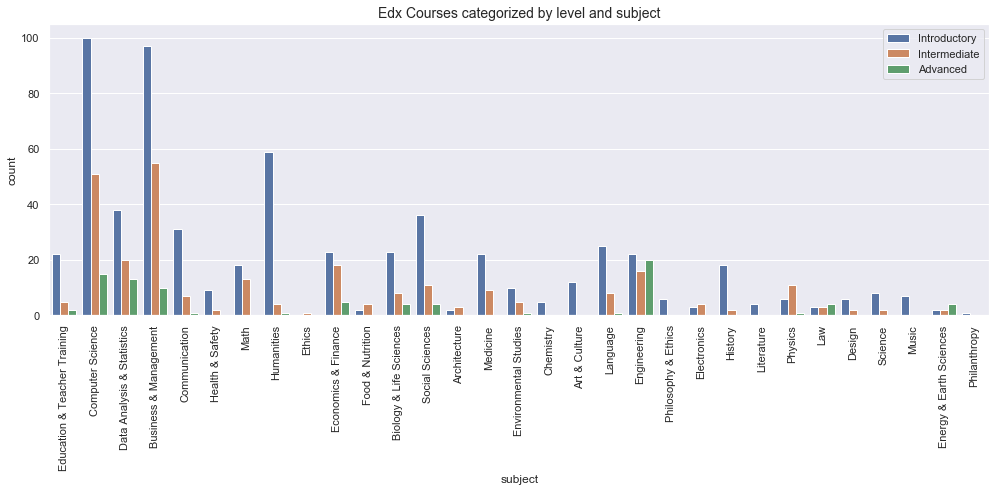

In [20]:
plt.figure(figsize = (14,7))
sns.countplot(data = edx_df, 
              x = edx_df["subject"], 
              hue = edx_df["Level"])
plt.title("Edx Courses categorized by level and subject", fontsize = 14)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('images/image2.png', bbox_inches = "tight")
plt.show()

<a id='part4-2'></a>
### 4.2 Show top 10 institution providing courses in Edx

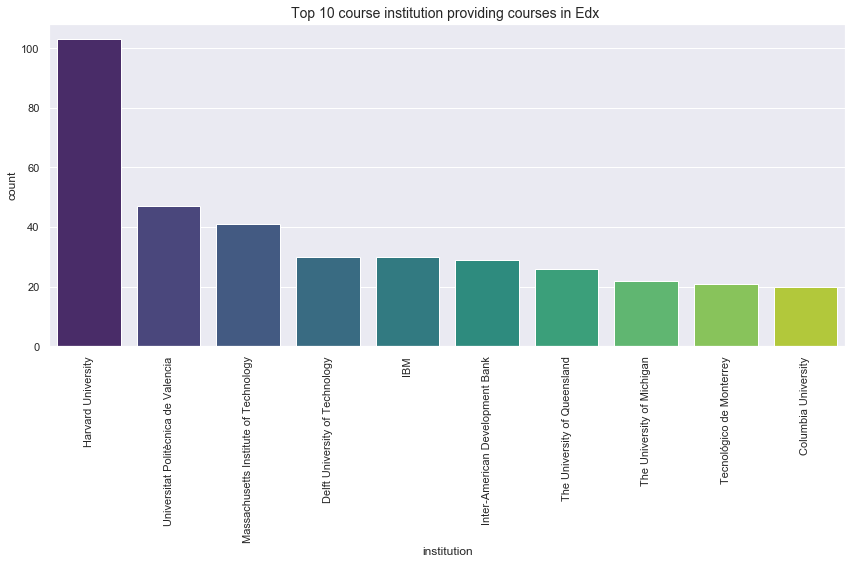

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(data= edx_df, 
              x = 'institution', 
              order=edx_df['institution'].value_counts().iloc[:10].index, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 10 course institution providing courses in Edx ", fontsize = 14)
plt.tight_layout()
plt.savefig('images/image3.png', bbox_inches = "tight")
plt.show()

<a id='part4-3'></a>
### 4.3 Show top 5 Course Certificate type by per number of enrolled students

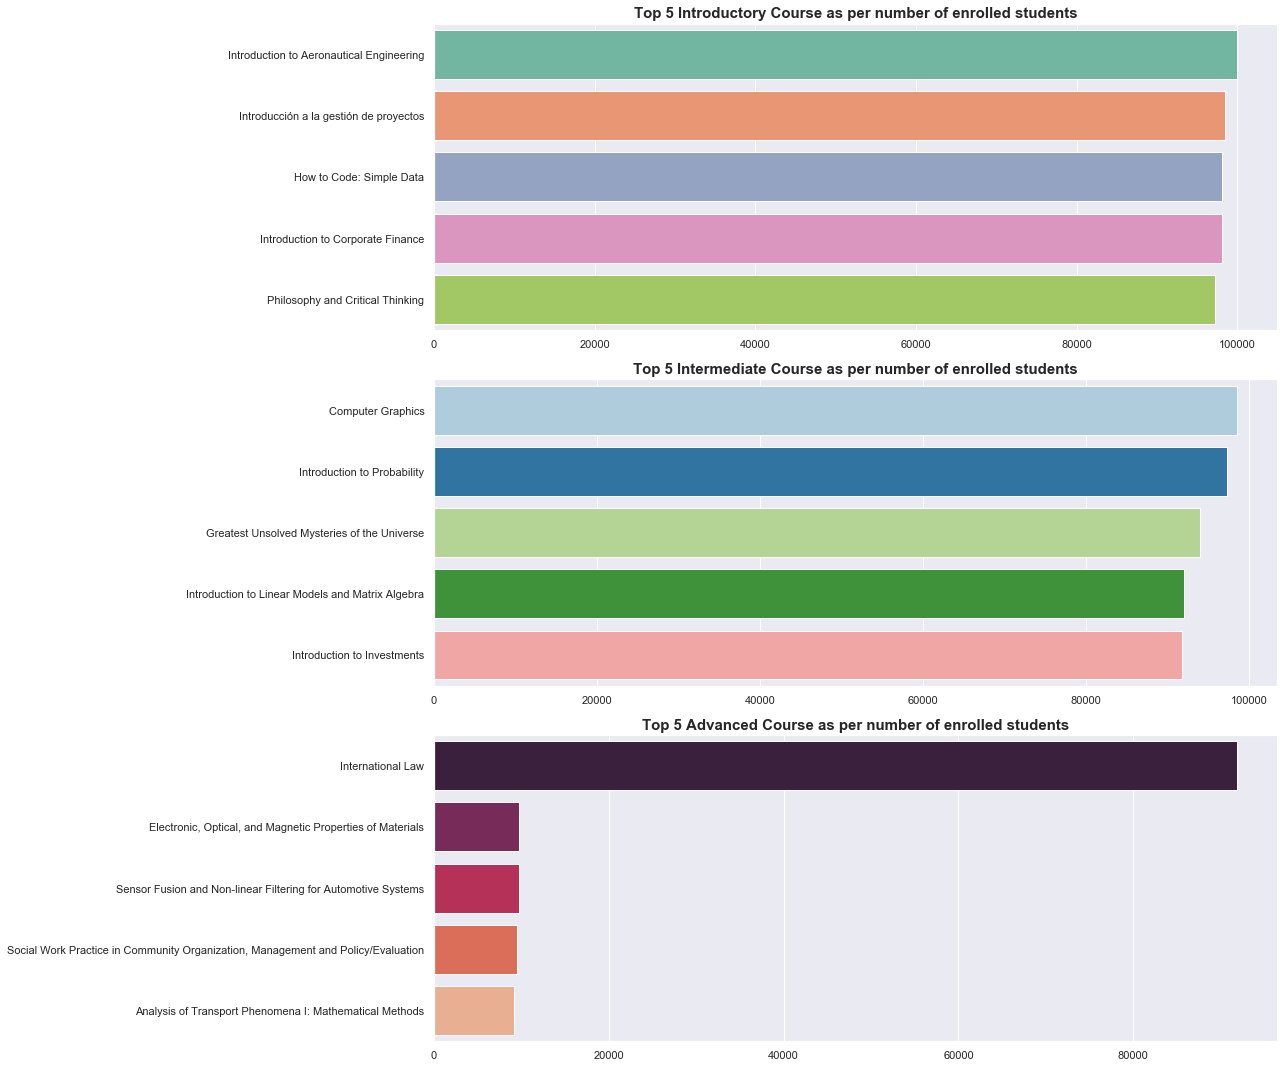

In [22]:
f,a = plt.subplots(3,1,figsize=(18,15))
f.subplots_adjust(wspace = .9)

sns.barplot(data = edx_df_1, x= 'n_enrolled' , y = 'title', ax=a[0], palette="Set2")
a[0].set_title('Top 5 Introductory Course as per number of enrolled students', fontsize=15, fontweight='bold')
a[0].set_xlabel('')
a[0].set_ylabel('')

sns.barplot(data = edx_df_2, x= 'n_enrolled' , y = 'title', ax=a[1], palette="Paired")
a[1].set_title('Top 5 Intermediate Course as per number of enrolled students', fontsize=15, fontweight='bold')
a[1].set_xlabel('');
a[1].set_ylabel('');

sns.barplot(data = edx_df_3, x= 'n_enrolled' , y = 'title', ax=a[2], palette="rocket")
a[2].set_title('Top 5 Advanced Course as per number of enrolled students', fontsize=15, fontweight='bold')
a[2].set_xlabel('')
a[2].set_ylabel('');

plt.tight_layout()
plt.savefig('images/image4.png', bbox_inches = "tight")
plt.show()

<a id='part4-4'></a>
### 4.4 Show top 10 Course by per number of enrolled students

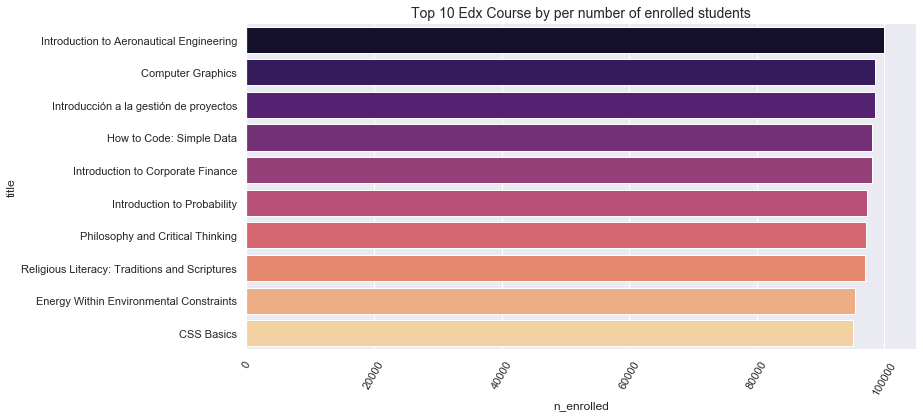

In [23]:
plt.figure(figsize=(12,6))

edx_df_top_10 = edx_df.sort_values('n_enrolled',ascending=False).head(10)
edx_df_top_10['n_enrolled'] = edx_df_top_10['n_enrolled'].str.replace(',','')
edx_df_top_10['n_enrolled'] = pd.to_numeric(edx_df_top_10['n_enrolled'])

sns.barplot(data = edx_df_top_10, x= 'n_enrolled' , y = 'title', palette='magma')
plt.xticks(rotation=60)
plt.title("Top 10 Edx Course by per number of enrolled students", fontsize = 14)
plt.savefig('images/image5.png', bbox_inches = "tight")
plt.show()

<a id='part4-5'></a>
### 4.5 Show the spectrum of edx courses by level,subject,language and a length of course  

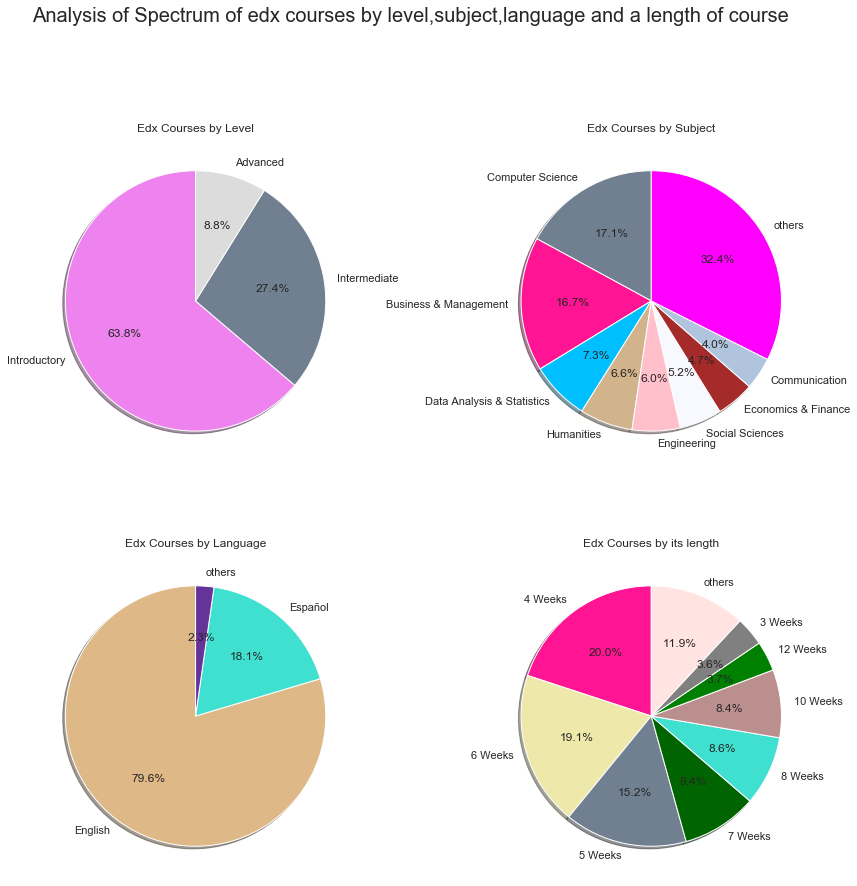

In [40]:
f,a = plt.subplots(2,2,figsize=(14,14))
f.subplots_adjust(wspace = .4)

colors_1 = random.choices(list(mcolors.CSS4_COLORS.values()),k = edx_df_level.size)
colors_2 = random.choices(list(mcolors.CSS4_COLORS.values()),k = edx_df_subject.size)
colors_3 = random.choices(list(mcolors.CSS4_COLORS.values()),k = edx_df_language.size)
colors_4 = random.choices(list(mcolors.CSS4_COLORS.values()),k = edx_df_course_length.size)

a[0,0].pie(edx_df_level["count"], 
        labels = edx_df_level["Level"],  
        startangle=90, shadow = True, autopct = '%1.1f%%', colors = colors_1)

a[0,0].set_title('Edx Courses by Level')
a[0,0].set_ylabel('');


a[0,1].pie(edx_df_subject_top_8_others["count"], 
        labels = edx_df_subject_top_8_others["subject"],  
        startangle=90, shadow = True, autopct = '%1.1f%%', colors = colors_2)

a[0,1].set_title('Edx Courses by Subject')
a[0,1].set_ylabel('');


a[1,0].pie(edx_df_language_top_2_others["count"], 
        labels = edx_df_language_top_2_others["language"],  
        startangle=90, shadow = True, autopct = '%1.1f%%', colors = colors_3)

a[1,0].set_title('Edx Courses by Language')
a[1,0].set_ylabel('');


a[1,1].pie(edx_df_course_length_top_8_others["count"], 
        labels = edx_df_course_length_top_8_others["course_length"],  
        startangle=90, shadow = True, autopct = '%1.1f%%', colors = colors_4)

a[1,1].set_title('Edx Courses by its length')
a[1,1].set_ylabel('');

f.suptitle("Analysis of Spectrum of edx courses by level,subject,language and a length of course", y=1, fontsize=20)
plt.savefig('images/image6.png')
plt.show()

<a id='part4-6'></a>
### 4.6 Show top 20 instructors with presenting course most   

In [25]:
edx_df_instructors = pd.DataFrame({'count' : edx_df.groupby(['instructors']).size()}).reset_index()
edx_df_instructors = edx_df_instructors.sort_values(['count'], ascending = False)
edx_df_instructors = edx_df_instructors.reset_index(drop=True)

edx_df_instructors_top_20 = edx_df_instructors.head(20)
edx_df_instructors_top_20

instructors  count
0                        Rafael Irizarry      9
1                         Maggie Sokolik      8
2                              Rav Ahuja      7
3          Peter K. Bol-William C. Kirby      7
4                   Thomas Forrest Kelly      7
5                            Alex Aklson      6
6     Petra Bonfert-Taylor-Rémi Sharrock      6
7                   Joseph Santarcangelo      6
8                           David Joyner      5
9                       Jeffrey D. Sachs      5
10          Rafael Irizarry-Michael Love      5
11                          John Johnson      5
12                          Estella Chen      5
13  Dacher Keltner-Emiliana Simon-Thomas      4
14                Daniela Bartalesi-Graf      4
15                   Thomas E. Patterson      4
16                     Charles Severance      4
17                           James Green      4
18                      Prof. Ana Gimeno      4
19                           Ted Supalla      4

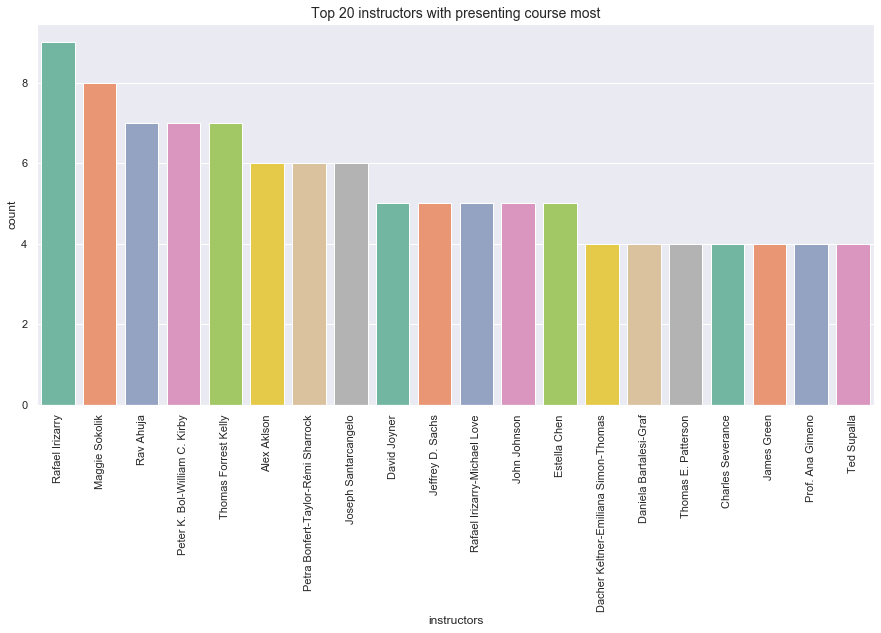

In [26]:
plt.figure(figsize=(15, 7))
sns.barplot(data = edx_df_instructors_top_20, x= 'instructors' , y = 'count', palette="Set2")
plt.title("Top 20 instructors with presenting course most", fontsize = 14)
plt.xticks(rotation=90)
plt.savefig('images/image7.png', bbox_inches = "tight")
plt.show()

<a id='part4-7'></a>
### 4.7 WordCloud   

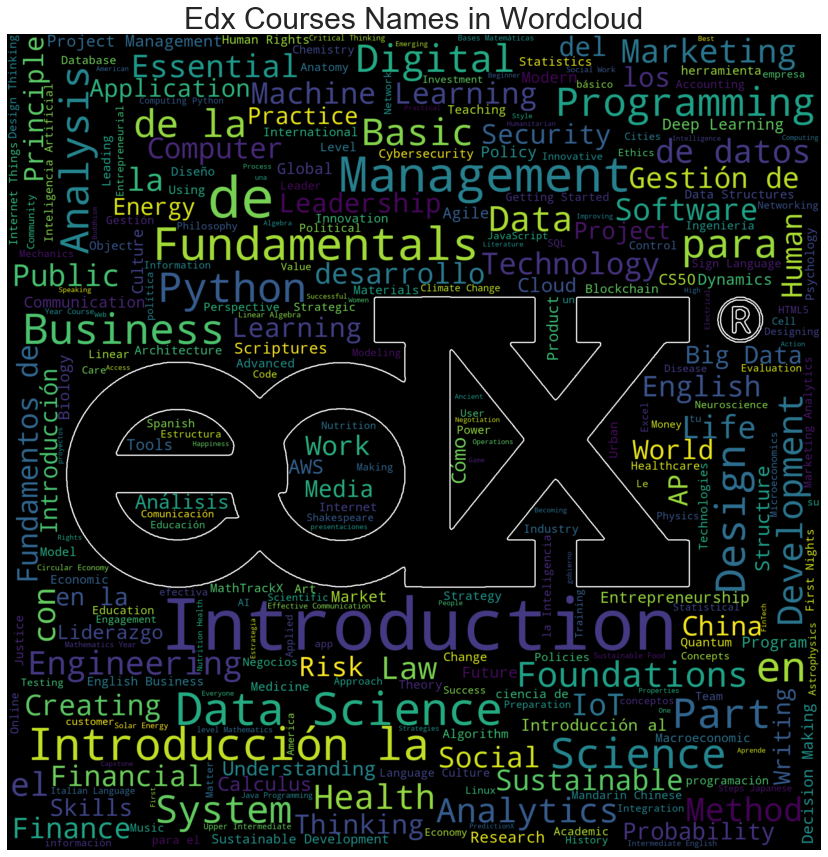

In [27]:
plt.figure(figsize=[15, 15])

image = Image.open("images/edX.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)


wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='black', 
                        #width=1000,  
                        #height=1000, 
                        max_words=300,
                        mask=char_mask,
                        contour_width=3, 
                        contour_color='white',
                    ).generate(' '.join(edx_df['title']))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Edx Courses Names in Wordcloud', fontsize=30)
plt.savefig('images/image8.png')
plt.show()